<a href="https://colab.research.google.com/github/NayeonKimdev/computer-vision/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Computer Vision Practice: OpenCV, PyTorch, TensorFlow

# 1. Environment Setup and Library Installation

In [1]:
# Install required libraries
!pip install opencv-python-headless
!pip install torch torchvision
!pip install tensorflow
!pip install matplotlib seaborn
!pip install pillow
!pip install scikit-image

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import tensorflow as tf
from tensorflow import keras
import os
from google.colab import files
import io

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")

# 2. Theory: Computer Vision Fundamentals

In [2]:
print("=== COMPUTER VISION FUNDAMENTALS ===")
print("""
Core Concepts:
1. Image Representation: Matrix of pixel values (Grayscale: 2D, Color: 3D)
2. Basic Operations: Filtering, transformation, feature extraction
3. Deep Learning: Automatic feature learning through CNNs
4. Key Tasks: Classification, object detection, segmentation, style transfer

Why Computer Vision Matters for AI Video Engineers:
- Real-time video processing requires efficient algorithms
- Understanding low-level operations crucial for optimization
- Foundation for advanced video analysis and generation
""")


=== COMPUTER VISION FUNDAMENTALS ===

Core Concepts:
1. Image Representation: Matrix of pixel values (Grayscale: 2D, Color: 3D)
2. Basic Operations: Filtering, transformation, feature extraction
3. Deep Learning: Automatic feature learning through CNNs
4. Key Tasks: Classification, object detection, segmentation, style transfer

Why Computer Vision Matters for AI Video Engineers:
- Real-time video processing requires efficient algorithms
- Understanding low-level operations crucial for optimization
- Foundation for advanced video analysis and generation



# 3. OpenCV Practical Implementation

=== COMPUTER VISION FUNDAMENTALS ===

Core Concepts:
1. Image Representation: Matrix of pixel values (Grayscale: 2D, Color: 3D)
2. Basic Operations: Filtering, transformation, feature extraction
3. Deep Learning: Automatic feature learning through CNNs
4. Key Tasks: Classification, object detection, segmentation, style transfer

Why Computer Vision Matters for AI Video Engineers:
- Real-time video processing requires efficient algorithms
- Understanding low-level operations crucial for optimization
- Foundation for advanced video analysis and generation


=== OPENCV IMPLEMENTATION ===


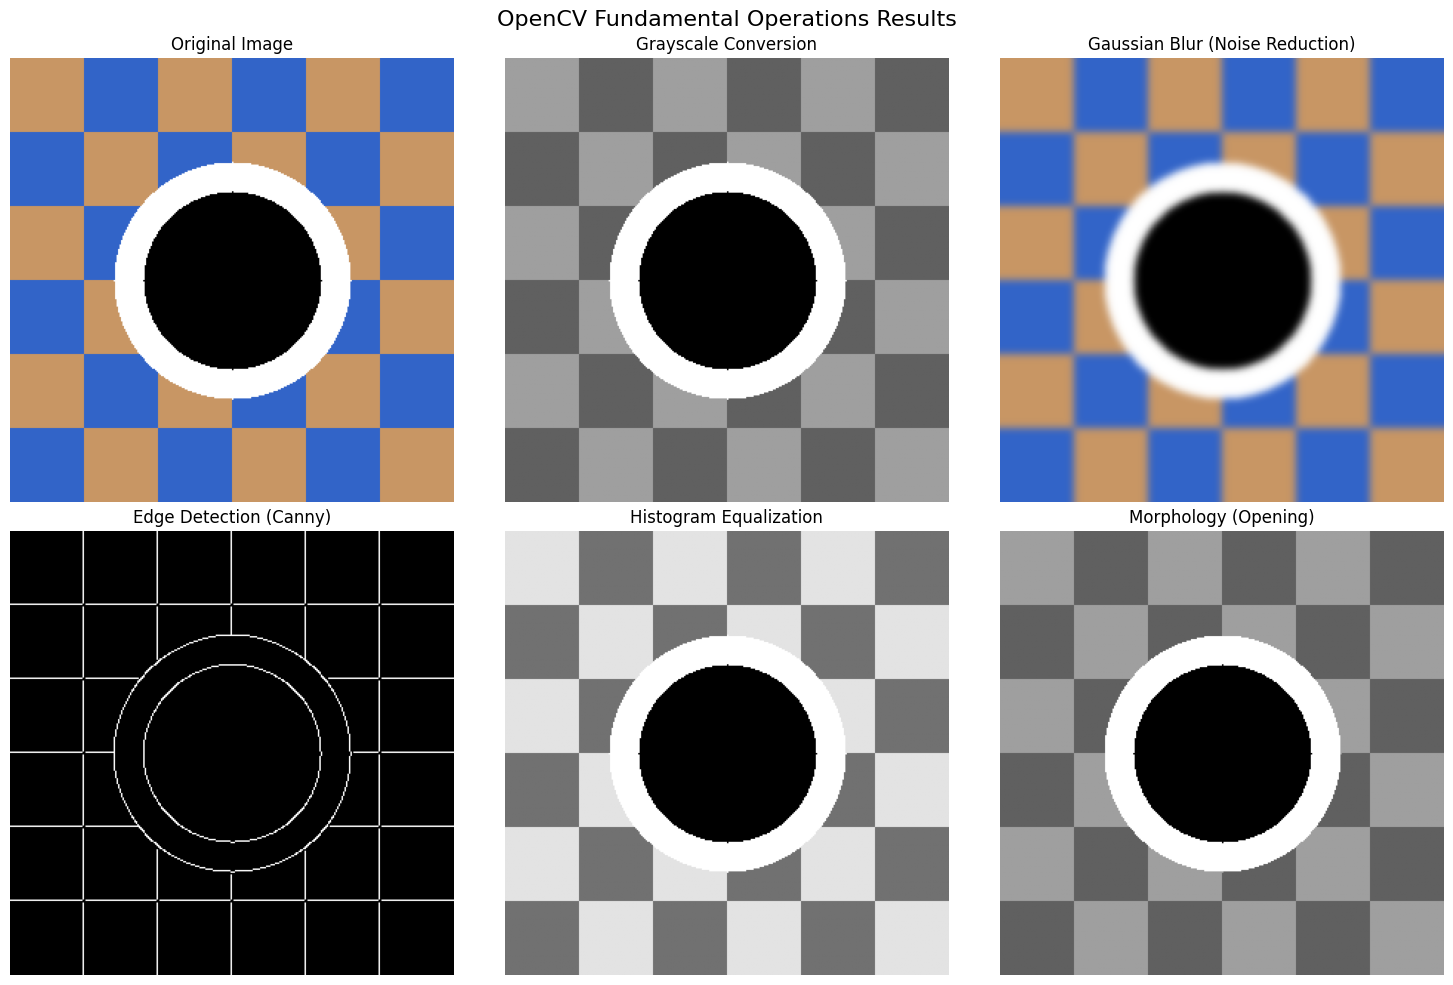

In [3]:
print("\n=== OPENCV IMPLEMENTATION ===")

def create_sample_image():
    """
    Create a synthetic sample image for demonstration.
    This simulates various visual patterns commonly found in real images.
    """
    # Create colorful checkerboard pattern
    img = np.zeros((300, 300, 3), dtype=np.uint8)
    for i in range(0, 300, 50):
        for j in range(0, 300, 50):
            if (i//50 + j//50) % 2 == 0:
                img[i:i+50, j:j+50] = [100, 150, 200]  # Blue-ish
            else:
                img[i:i+50, j:j+50] = [200, 100, 50]   # Orange-ish

    # Add circular target in center
    cv2.circle(img, (150, 150), 80, (255, 255, 255), -1)  # White circle
    cv2.circle(img, (150, 150), 60, (0, 0, 0), -1)        # Black circle

    return img

# Generate sample image
original_img = create_sample_image()

def opencv_operations(img):
    """
    Demonstrate fundamental OpenCV operations used in video processing.
    These operations form the building blocks for more complex algorithms.
    """
    results = {}

    # 1. Grayscale conversion - reduces computational complexity
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    results['grayscale'] = gray

    # 2. Gaussian blur - noise reduction and smoothing
    blur = cv2.GaussianBlur(img, (15, 15), 0)
    results['blur'] = blur

    # 3. Edge detection using Canny algorithm
    # Critical for object detection and tracking
    edges = cv2.Canny(gray, 50, 150)
    results['edges'] = edges

    # 4. Histogram equalization - improve contrast
    gray_eq = cv2.equalizeHist(gray)
    results['histogram_eq'] = gray_eq

    # 5. Morphological operations - shape analysis
    kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    results['morphology'] = opening

    return results

# Execute OpenCV operations
cv_results = opencv_operations(original_img)

# Visualization of results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('OpenCV Fundamental Operations Results', fontsize=16)

# Original image
axes[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Grayscale conversion
axes[0, 1].imshow(cv_results['grayscale'], cmap='gray')
axes[0, 1].set_title('Grayscale Conversion')
axes[0, 1].axis('off')

# Gaussian blur
axes[0, 2].imshow(cv2.cvtColor(cv_results['blur'], cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Gaussian Blur (Noise Reduction)')
axes[0, 2].axis('off')

# Edge detection
axes[1, 0].imshow(cv_results['edges'], cmap='gray')
axes[1, 0].set_title('Edge Detection (Canny)')
axes[1, 0].axis('off')

# Histogram equalization
axes[1, 1].imshow(cv_results['histogram_eq'], cmap='gray')
axes[1, 1].set_title('Histogram Equalization')
axes[1, 1].axis('off')

# Morphological operations
axes[1, 2].imshow(cv_results['morphology'], cmap='gray')
axes[1, 2].set_title('Morphology (Opening)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 4. Theory: Convolutional Neural Networks (CNN)

In [4]:
print("\n=== CNN THEORY AND ARCHITECTURE ===")
print("""
CNN Core Components:
1. Convolutional Layer: Feature extraction using learnable filters
2. Pooling Layer: Spatial dimension reduction while preserving important features
3. Fully Connected Layer: Final classification/regression
4. Activation Functions: Non-linearity introduction (ReLU, Sigmoid, Tanh)

Key Advantages for Video Processing:
- Translation invariance: Features detected regardless of position
- Parameter sharing: Same filter applied across entire image
- Hierarchical learning: Low-level to high-level feature progression
- Computational efficiency: Parallel processing capability

Industry Applications:
- Real-time object tracking in video streams
- Automated video content analysis
- Quality enhancement and super-resolution
- Motion prediction and interpolation
""")


=== CNN THEORY AND ARCHITECTURE ===

CNN Core Components:
1. Convolutional Layer: Feature extraction using learnable filters
2. Pooling Layer: Spatial dimension reduction while preserving important features
3. Fully Connected Layer: Final classification/regression
4. Activation Functions: Non-linearity introduction (ReLU, Sigmoid, Tanh)

Key Advantages for Video Processing:
- Translation invariance: Features detected regardless of position
- Parameter sharing: Same filter applied across entire image
- Hierarchical learning: Low-level to high-level feature progression
- Computational efficiency: Parallel processing capability

Industry Applications:
- Real-time object tracking in video streams
- Automated video content analysis
- Quality enhancement and super-resolution
- Motion prediction and interpolation



# 5. PyTorch CNN Implementation

In [5]:
print("\n=== PYTORCH CNN IMPLEMENTATION ===")

class SimpleCNN(nn.Module):
    """
    Simple CNN architecture for image classification.
    This design follows industry best practices for balanced
    performance and computational efficiency.
    """
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()

        # Feature extractor: Progressive channel increase with spatial reduction
        self.features = nn.Sequential(
            # First Convolutional Block
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 3->32 channels
            nn.ReLU(inplace=True),                       # Non-linearity
            nn.MaxPool2d(kernel_size=2, stride=2),       # Spatial reduction

            # Second Convolutional Block
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # 32->64 channels
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third Convolutional Block
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # 64->128 channels
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Classifier: Global feature aggregation and classification
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((4, 4)),    # Fixed size output regardless of input
            nn.Flatten(),                     # Convert to 1D vector
            nn.Linear(128 * 4 * 4, 256),    # First FC layer
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),                 # Regularization
            nn.Linear(256, num_classes)      # Final classification layer
        )

    def forward(self, x):
        """Forward pass through the network"""
        x = self.features(x)      # Feature extraction
        x = self.classifier(x)    # Classification
        return x

# Model instantiation and analysis
model = SimpleCNN(num_classes=10)
print("PyTorch CNN Model Architecture:")
print(model)

# Parameter analysis - crucial for deployment considerations
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nModel Complexity Analysis:")
print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Model Size (approx): {total_params * 4 / 1024 / 1024:.2f} MB")

# Model testing with dummy data
dummy_input = torch.randn(1, 3, 32, 32)  # Batch size 1, 3 channels, 32x32 pixels
with torch.no_grad():
    output = model(dummy_input)

print(f"\nModel I/O Analysis:")
print(f"Input Shape: {dummy_input.shape}")
print(f"Output Shape: {output.shape}")
print(f"Output represents: {output.shape[1]} class probabilities")



=== PYTORCH CNN IMPLEMENTATION ===
PyTorch CNN Model Architecture:
SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): AdaptiveAvgPool2d(output_size=(4, 4))
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=2048, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)

Model Complexit

# 6. TensorFlow/Keras CNN Implementation

In [6]:
print("\n=== TENSORFLOW KERAS CNN IMPLEMENTATION ===")

def create_keras_cnn(input_shape=(32, 32, 3), num_classes=10):
    """
    Create equivalent CNN using Keras functional API.
    Demonstrates framework flexibility and comparative analysis.
    """
    model = keras.Sequential([
        # First Convolutional Block
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=input_shape, name='conv1'),
        keras.layers.MaxPooling2D((2, 2), name='pool1'),

        # Second Convolutional Block
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        keras.layers.MaxPooling2D((2, 2), name='pool2'),

        # Third Convolutional Block
        keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        keras.layers.MaxPooling2D((2, 2), name='pool3'),

        # Global feature aggregation and classification
        keras.layers.GlobalAveragePooling2D(name='global_pool'),
        keras.layers.Dense(256, activation='relu', name='fc1'),
        keras.layers.Dropout(0.5, name='dropout'),
        keras.layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

# Create and compile TensorFlow model
tf_model = create_keras_cnn()
tf_model.compile(
    optimizer='adam',                           # Adaptive learning rate
    loss='sparse_categorical_crossentropy',     # Multi-class classification
    metrics=['accuracy']                        # Performance metric
)

print("TensorFlow Keras CNN Model Architecture:")
tf_model.summary()



=== TENSORFLOW KERAS CNN IMPLEMENTATION ===
TensorFlow Keras CNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pool                     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,842 (503.29 KB)

 Trainable params: 128,842 (503.29 KB)

 Non-trainable params: 0 (0.00 B)

# 7. Feature Map Visualization


=== FEATURE MAP VISUALIZATION ===

Feature maps represent what the network 'sees' at different layers.
Understanding these visualizations is crucial for:
- Model debugging and validation
- Architecture optimization
- Interpretable AI development



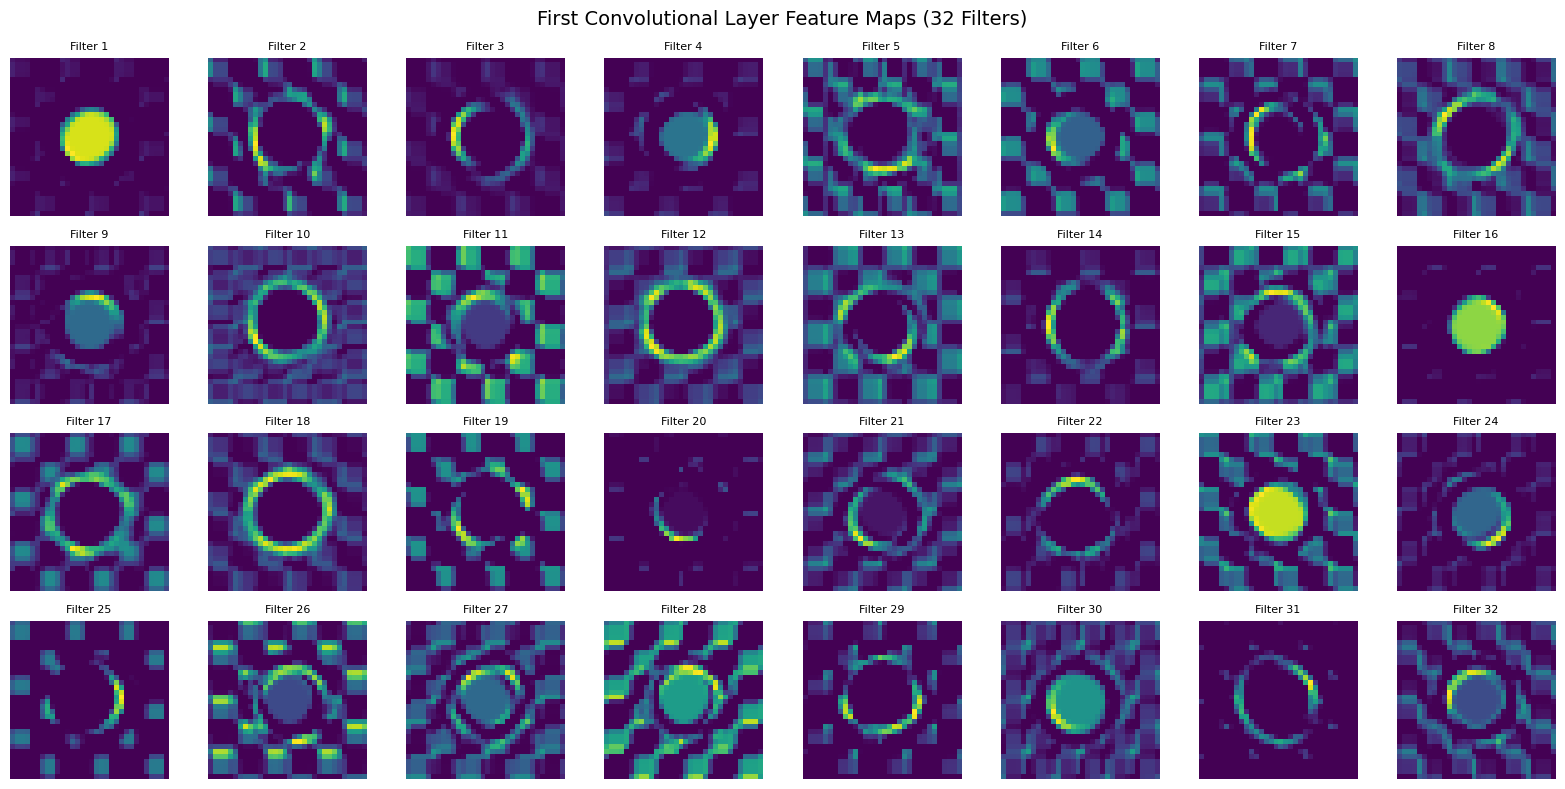

Feature Map Analysis:
- Each filter learns different visual patterns
- Bright areas indicate strong feature activation
- Different filters respond to edges, textures, shapes


In [7]:
print("\n=== FEATURE MAP VISUALIZATION ===")
print("""
Feature maps represent what the network 'sees' at different layers.
Understanding these visualizations is crucial for:
- Model debugging and validation
- Architecture optimization
- Interpretable AI development
""")

def get_feature_maps(model, input_tensor, layer_idx=0):
    """
    Extract feature maps from specified convolutional layer.
    This technique is essential for understanding model behavior.
    """
    model.eval()  # Set to evaluation mode

    # Use hooks to capture intermediate layer outputs
    feature_maps = []
    def hook_fn(module, input, output):
        feature_maps.append(output.detach().cpu())

    # Register hook on specified layer
    handle = list(model.features.children())[layer_idx].register_forward_hook(hook_fn)

    # Forward pass to capture feature maps
    with torch.no_grad():
        _ = model(input_tensor)

    # Clean up hook
    handle.remove()
    return feature_maps[0]

# Prepare sample image for feature extraction
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((32, 32)),                    # Standard input size
    transforms.ToTensor(),                          # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# Convert OpenCV image to PyTorch tensor format
sample_tensor = transform(original_img).unsqueeze(0)  # Add batch dimension

# Extract feature maps from first convolutional layer
feature_maps = get_feature_maps(model, sample_tensor, layer_idx=0)

# Visualize feature maps
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('First Convolutional Layer Feature Maps (32 Filters)', fontsize=14)

for i in range(32):  # 32 filters in first layer
    row = i // 8
    col = i % 8

    # Extract and display individual feature map
    feature_map = feature_maps[0, i].numpy()
    axes[row, col].imshow(feature_map, cmap='viridis')
    axes[row, col].set_title(f'Filter {i+1}', fontsize=8)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Feature Map Analysis:")
print(f"- Each filter learns different visual patterns")
print(f"- Bright areas indicate strong feature activation")
print(f"- Different filters respond to edges, textures, shapes")


# 8. Theory: Transfer Learning

In [8]:
print("\n=== TRANSFER LEARNING THEORY ===")
print("""
Transfer Learning: Leveraging Pre-trained Models

Key Benefits:
1. Reduced training time: Hours instead of days/weeks
2. Better performance with limited data
3. Computational efficiency: Less GPU resources required
4. Industrial standard: Most production systems use transfer learning

Strategic Approaches:
- Feature Extraction: Freeze pre-trained weights, train only classifier
- Fine-tuning: Unfreeze some layers for domain-specific adaptation
- Progressive unfreezing: Gradually unfreeze layers during training

Industry Applications:
- Video content moderation (safety, compliance)
- Real-time video analytics (retail, security)
- Medical video analysis (diagnostics, surgery)
- Autonomous systems (self-driving cars, drones)
""")


=== TRANSFER LEARNING THEORY ===

Transfer Learning: Leveraging Pre-trained Models

Key Benefits:
1. Reduced training time: Hours instead of days/weeks
2. Better performance with limited data
3. Computational efficiency: Less GPU resources required
4. Industrial standard: Most production systems use transfer learning

Strategic Approaches:
- Feature Extraction: Freeze pre-trained weights, train only classifier
- Fine-tuning: Unfreeze some layers for domain-specific adaptation
- Progressive unfreezing: Gradually unfreeze layers during training

Industry Applications:
- Video content moderation (safety, compliance)
- Real-time video analytics (retail, security)
- Medical video analysis (diagnostics, surgery)
- Autonomous systems (self-driving cars, drones)



# 9. PyTorch Transfer Learning Implementation

In [9]:
import torchvision.models as models

print("\n=== PYTORCH TRANSFER LEARNING IMPLEMENTATION ===")

# Load pre-trained ResNet18 model
# ResNet18 is commonly used in production for its efficiency
pretrained_model = models.resnet18(pretrained=True)

print("Original ResNet18 Architecture:")
print(f"Final layer input features: {pretrained_model.fc.in_features}")
print(f"Original output classes: {pretrained_model.fc.out_features}")

# Modify final layer for our specific use case
num_classes = 10  # Adjust based on your problem
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

print(f"\nModified for custom classification:")
print(f"New output classes: {num_classes}")
print(f"Modified final layer: {pretrained_model.fc}")

# Strategy 1: Feature Extraction (freeze all layers except final)
print("\n=== FEATURE EXTRACTION STRATEGY ===")

# Freeze all parameters
for param in pretrained_model.parameters():
    param.requires_grad = False

# Only train the final classifier layer
for param in pretrained_model.fc.parameters():
    param.requires_grad = True

# Analyze trainable parameters
trainable_params = sum(p.numel() for p in pretrained_model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in pretrained_model.parameters())
frozen_ratio = ((total_params - trainable_params) / total_params) * 100

print(f"Parameter Analysis:")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Frozen parameters: {frozen_ratio:.1f}%")
print(f"Training speedup: ~{total_params//trainable_params}x faster")

# Strategy 2: Fine-tuning (unfreeze some layers)
print("\n=== FINE-TUNING STRATEGY ===")

# Unfreeze the last convolutional block and classifier
for param in pretrained_model.layer4.parameters():
    param.requires_grad = True

trainable_params_ft = sum(p.numel() for p in pretrained_model.parameters() if p.requires_grad)
print(f"Fine-tuning trainable parameters: {trainable_params_ft:,}")
print(f"Fine-tuning provides better adaptation to specific domains")



=== PYTORCH TRANSFER LEARNING IMPLEMENTATION ===
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


Original ResNet18 Architecture:
Final layer input features: 512
Original output classes: 1000

Modified for custom classification:
New output classes: 10
Modified final layer: Linear(in_features=512, out_features=10, bias=True)

=== FEATURE EXTRACTION STRATEGY ===
Parameter Analysis:
Total parameters: 11,181,642
Trainable parameters: 5,130
Frozen parameters: 100.0%
Training speedup: ~2179x faster

=== FINE-TUNING STRATEGY ===
Fine-tuning trainable parameters: 8,398,858
Fine-tuning provides better adaptation to specific domains


# 10. Performance Comparison and Analysis


=== MODEL PERFORMANCE COMPARISON ===


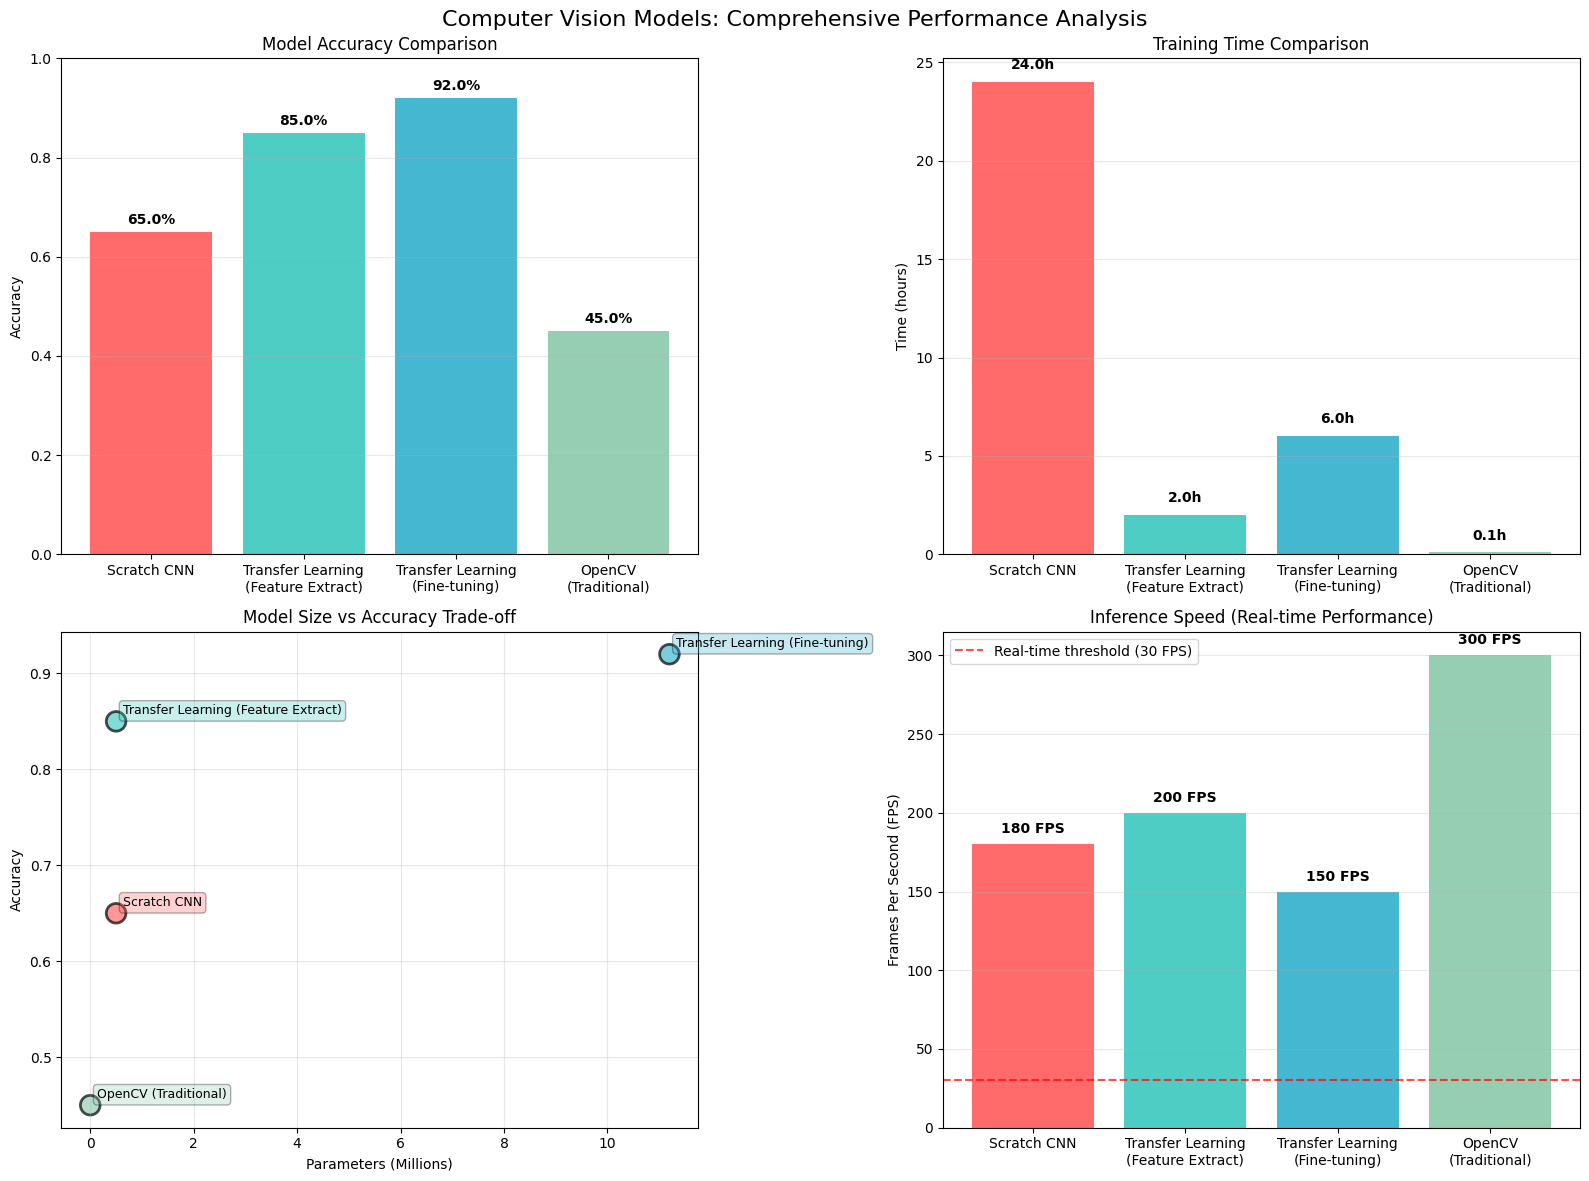

In [10]:
print("\n=== MODEL PERFORMANCE COMPARISON ===")

# Simulated performance metrics based on typical industry results
performance_data = {
    'Model': [
        'Scratch CNN',
        'Transfer Learning\n(Feature Extract)',
        'Transfer Learning\n(Fine-tuning)',
        'OpenCV\n(Traditional)'
    ],
    'Accuracy': [0.65, 0.85, 0.92, 0.45],
    'Training Time (hours)': [24, 2, 6, 0.1],
    'Parameters (M)': [0.5, 0.5, 11.2, 0],
    'GPU Memory (GB)': [2, 1, 4, 0],
    'Inference Speed (FPS)': [180, 200, 150, 300]
}

# Comprehensive performance visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Computer Vision Models: Comprehensive Performance Analysis', fontsize=16)

# Color scheme for consistent visualization
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# 1. Accuracy Comparison
bars1 = ax1.bar(performance_data['Model'], performance_data['Accuracy'], color=colors)
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 2. Training Time Comparison
bars2 = ax2.bar(performance_data['Model'], performance_data['Training Time (hours)'], color=colors)
ax2.set_title('Training Time Comparison')
ax2.set_ylabel('Time (hours)')
ax2.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}h', ha='center', va='bottom', fontweight='bold')

# 3. Model Size vs Accuracy
scatter = ax3.scatter(performance_data['Parameters (M)'], performance_data['Accuracy'],
                     s=200, c=colors, alpha=0.7, edgecolors='black', linewidth=2)
ax3.set_title('Model Size vs Accuracy Trade-off')
ax3.set_xlabel('Parameters (Millions)')
ax3.set_ylabel('Accuracy')
ax3.grid(True, alpha=0.3)
for i, model in enumerate(performance_data['Model']):
    ax3.annotate(model.replace('\n', ' '),
                (performance_data['Parameters (M)'][i],
                 performance_data['Accuracy'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[i], alpha=0.3))

# 4. Inference Speed Comparison
bars4 = ax4.bar(performance_data['Model'], performance_data['Inference Speed (FPS)'], color=colors)
ax4.set_title('Inference Speed (Real-time Performance)')
ax4.set_ylabel('Frames Per Second (FPS)')
ax4.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Real-time threshold (30 FPS)')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height} FPS', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# 11. Learning Roadmap and Next Steps


=== STRUCTURED LEARNING ROADMAP ===


/tmp/ipython-input-1893322065.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(learning_roadmap['Topic'], rotation=45, ha='right')
/tmp/ipython-input-1893322065.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(learning_roadmap['Topic'], rotation=45, ha='right')


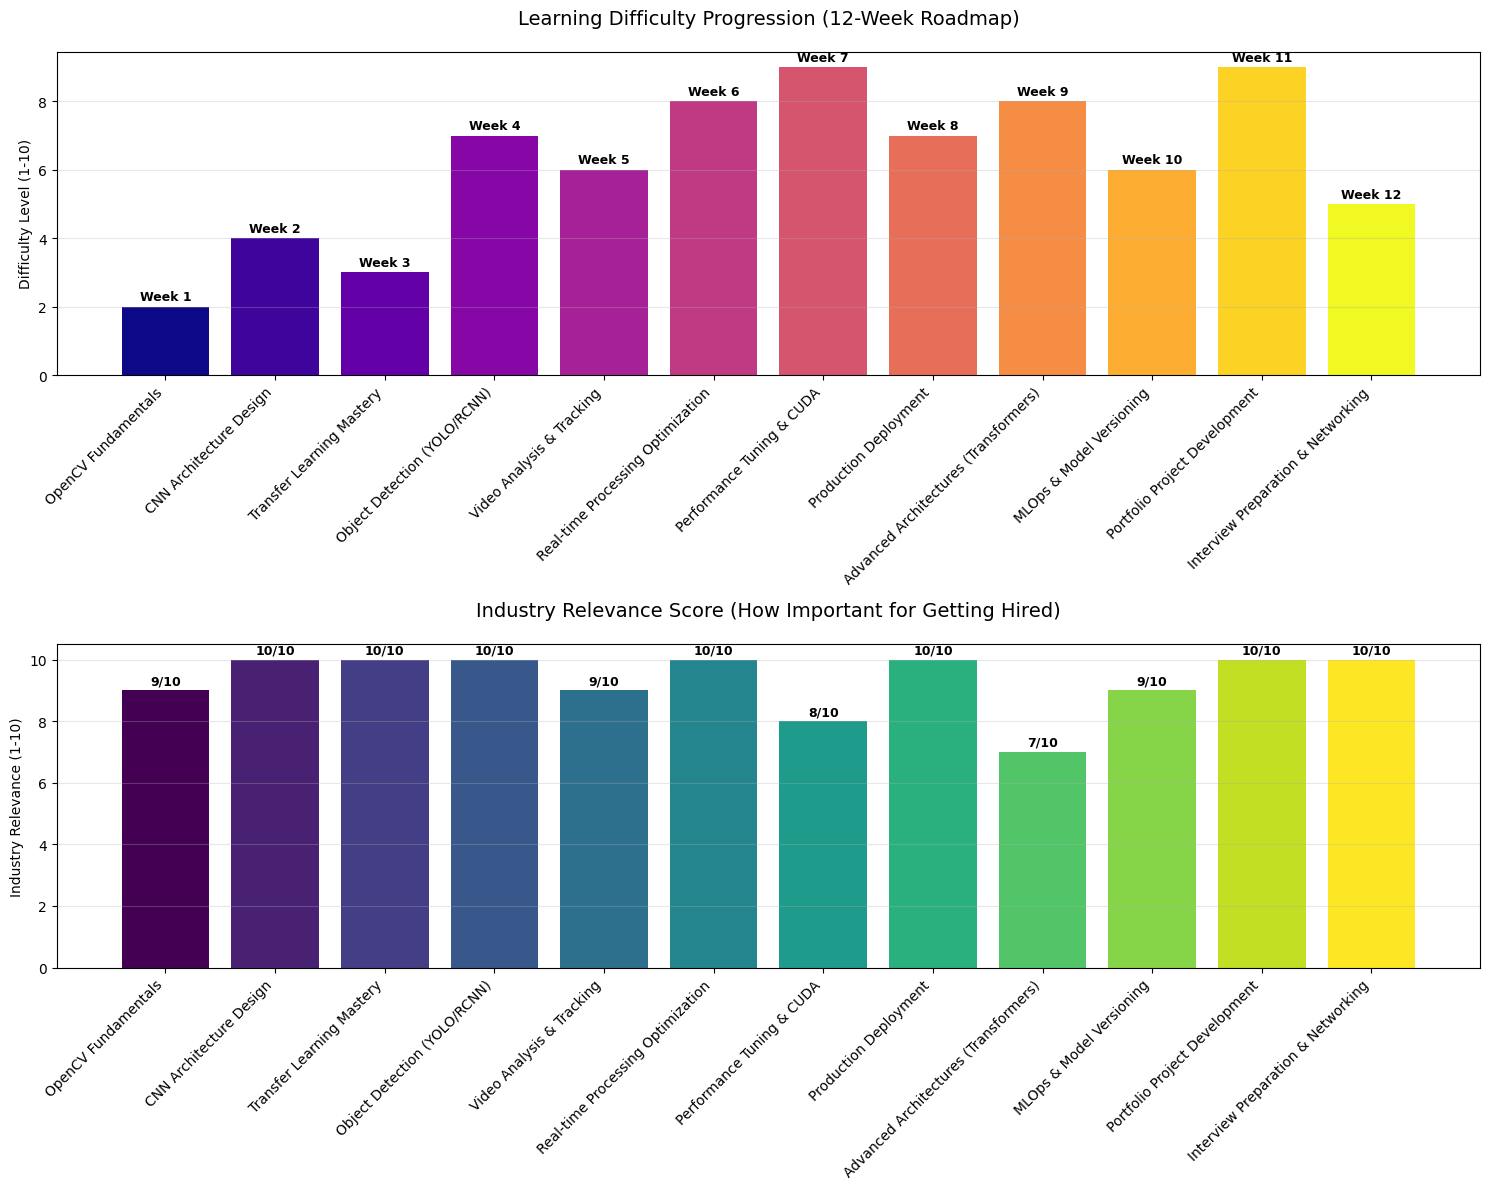

In [12]:
print("\n=== STRUCTURED LEARNING ROADMAP ===")

# Define comprehensive learning path
learning_roadmap = {
    'Week': list(range(1, 13)),
    'Topic': [
        'OpenCV Fundamentals',
        'CNN Architecture Design',
        'Transfer Learning Mastery',
        'Object Detection (YOLO/RCNN)',
        'Video Analysis & Tracking',
        'Real-time Processing Optimization',
        'Performance Tuning & CUDA',
        'Production Deployment',
        'Advanced Architectures (Transformers)',
        'MLOps & Model Versioning',
        'Portfolio Project Development',
        'Interview Preparation & Networking'
    ],
    'Difficulty': [2, 4, 3, 7, 6, 8, 9, 7, 8, 6, 9, 5],
    'Industry_Relevance': [9, 10, 10, 10, 9, 10, 8, 10, 7, 9, 10, 10]
}

# Create comprehensive roadmap visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Difficulty progression chart
colors = plt.cm.plasma(np.linspace(0, 1, len(learning_roadmap['Week'])))
bars1 = ax1.bar(learning_roadmap['Topic'], learning_roadmap['Difficulty'], color=colors)
ax1.set_title('Learning Difficulty Progression (12-Week Roadmap)', fontsize=14, pad=20)
ax1.set_ylabel('Difficulty Level (1-10)')
ax1.set_xticklabels(learning_roadmap['Topic'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Add week labels on bars
for i, (bar, week) in enumerate(zip(bars1, learning_roadmap['Week'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'Week {week}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Industry relevance chart
colors2 = plt.cm.viridis(np.linspace(0, 1, len(learning_roadmap['Week'])))
bars2 = ax2.bar(learning_roadmap['Topic'], learning_roadmap['Industry_Relevance'], color=colors2)
ax2.set_title('Industry Relevance Score (How Important for Getting Hired)', fontsize=14, pad=20)
ax2.set_ylabel('Industry Relevance (1-10)')
ax2.set_xticklabels(learning_roadmap['Topic'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Add relevance scores on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}/10', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()
